<a href="https://colab.research.google.com/github/noushadkhan01/sta-pred/blob/master/sta_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

!pip install beautifulsoup4==4.5.3

!pip install html-table-extractor

In [0]:
import pandas as pd
urls = ['https://satta-company.com/desawar-satta-chart-record-2010.php', 'https://satta-company.com/desawar-satta-chart-record-2011.php',
        'https://satta-company.com/desawar-satta-chart-record-2012.php','https://satta-company.com/desawar-satta-chart-record-2013.php',
        'https://satta-company.com/desawar-satta-chart-record-2014.php','https://satta-company.com/desawar-satta-chart-record-2015.php',
        'https://satta-company.com/desawar-satta-chart-record-2016.php','https://satta-company.com/desawar-satta-chart-record-2017.php',
        'https://satta-company.com/desawar-satta-chart-record-2018.php'
       ]

In [0]:
m = 0
df2 = pd.DataFrame(columns = ['Number'])
for n, i in enumerate(urls):
  df1 = pd.read_html(i)
  df1 = df1[5]
  df1 = pd.DataFrame(df1).iloc[1:, 1:]
  for i in range(len(df1.columns)):
    for j in range(len(df1)):
      df2.loc[m] = df1.iloc[j, i]
      m += 1
  

In [176]:
df.head()

,Number
0,76
1,58
2,97
3,29
4,12


In [178]:
df.isnull().sum()

Number    18
dtype: int64

In [179]:
df2 = df.dropna()
df2.shape

(3270, 1)

In [199]:
df2.Number.unique()

array(['76', '58', '97', '29', '12', '65', '38', '05', '48', '49', '91',
       '72', '18', '94', '79', '73', '04', '00', '46', '68', '02', '61',
       '20', '42', '07', '92', '56', '41', '36', '44', '98', '82', '01',
       '31', '32', '11', '25', '63', '66', '83', '69', '55', '67', '35',
       '90', 'XX', '43', '71', '84', '10', '40', '74', '60', '26', '57',
       '93', '87', '80', '50', '47', '85', '13', '37', '28', '09', '59',
       '17', '23', '89', '03', '86', '21', '08', '62', '53', '96', '77',
       '15', '34', '30', '51', '95', '33', '14', '78', '27', '22', '06',
       '45', '39', '88', '64', '75', '81', '16', '99', '52', '70', '19',
       '24', '54', '100', '61R', '❤', 'xx', '**', '⚔', '52r', '31R',
       '04r', '97r', '91R', 'xX', 'Xx'], dtype=object)

In [212]:
# regex    ---we can learn more about regex at https://bit.ly/2LpUhQL
df2 = df2.replace({
    'Number':'[^0-9]'
},'', regex = True)
df2.Number.unique()

array(['76', '58', '97', '29', '12', '65', '38', '05', '48', '49', '91',
       '72', '18', '94', '79', '73', '04', '00', '46', '68', '02', '61',
       '20', '42', '07', '92', '56', '41', '36', '44', '98', '82', '01',
       '31', '32', '11', '25', '63', '66', '83', '69', '55', '67', '35',
       '90', '', '43', '71', '84', '10', '40', '74', '60', '26', '57',
       '93', '87', '80', '50', '47', '85', '13', '37', '28', '09', '59',
       '17', '23', '89', '03', '86', '21', '08', '62', '53', '96', '77',
       '15', '34', '30', '51', '95', '33', '14', '78', '27', '22', '06',
       '45', '39', '88', '64', '75', '81', '16', '99', '52', '70', '19',
       '24', '54', '100'], dtype=object)

In [213]:
df2.shape

(3270, 1)

In [0]:
import numpy as np

In [215]:
df2 = df2.replace([''], [np.nan])
df2.Number.unique()

array(['76', '58', '97', '29', '12', '65', '38', '05', '48', '49', '91',
       '72', '18', '94', '79', '73', '04', '00', '46', '68', '02', '61',
       '20', '42', '07', '92', '56', '41', '36', '44', '98', '82', '01',
       '31', '32', '11', '25', '63', '66', '83', '69', '55', '67', '35',
       '90', nan, '43', '71', '84', '10', '40', '74', '60', '26', '57',
       '93', '87', '80', '50', '47', '85', '13', '37', '28', '09', '59',
       '17', '23', '89', '03', '86', '21', '08', '62', '53', '96', '77',
       '15', '34', '30', '51', '95', '33', '14', '78', '27', '22', '06',
       '45', '39', '88', '64', '75', '81', '16', '99', '52', '70', '19',
       '24', '54', '100'], dtype=object)

In [216]:
df2.isnull().sum()

Number    113
dtype: int64

In [217]:
df2 = df2.dropna()
df2.shape

(3157, 1)

In [218]:
train = df2[:-30]
train.shape

(3127, 1)

In [219]:
test = df2[-30:]
test.shape

(30, 1)

In [220]:
test.head(2)

,Number
321,03
322,86


In [0]:
from sklearn.preprocessing import StandardScaler

In [224]:
sc = StandardScaler()
train = sc.fit_transform(train)
test = sc.transform(test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [225]:
X_train = train[:-1]
y_train = train[1:]
X_train.shape, y_train.shape

((3126, 1), (3126, 1))

# reshape train and test data

In [228]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(3126, 1, 1)

In [235]:
import tensorflow as tf
regressor2 = tf.keras.Sequential([
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.LSTM(units = 20, activation = 'sigmoid', input_shape = (None, 1)),
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(1)
   ])
regressor2.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])
regressor2.fit(X_train, y_train, epochs = 30)

Epoch 1/30
3126/3126 [==============================] - 3s 874us/step - loss: 1.0038 - acc: 0.0000e+00
Epoch 2/30
3126/3126 [==============================] - 1s 385us/step - loss: 1.0030 - acc: 0.0000e+00
Epoch 3/30
3126/3126 [==============================] - 1s 414us/step - loss: 1.0042 - acc: 0.0000e+00
Epoch 4/30
3126/3126 [==============================] - 1s 386us/step - loss: 1.0004 - acc: 0.0000e+00
Epoch 5/30
3126/3126 [==============================] - 1s 418us/step - loss: 1.0032 - acc: 0.0000e+00
Epoch 6/30
3126/3126 [==============================] - 1s 394us/step - loss: 1.0023 - acc: 0.0000e+00
Epoch 7/30
3126/3126 [==============================] - 1s 410us/step - loss: 0.9998 - acc: 0.0000e+00
Epoch 8/30
3126/3126 [==============================] - 1s 385us/step - loss: 1.0023 - acc: 0.0000e+00
Epoch 9/30
3126/3126 [==============================] - 1s 409us/step - loss: 1.0008 - acc: 0.0000e+00
Epoch 10/30
3126/3126 [==============================] - 1s 381us/step - 

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
y_pred = regressor2.predict(X_train)

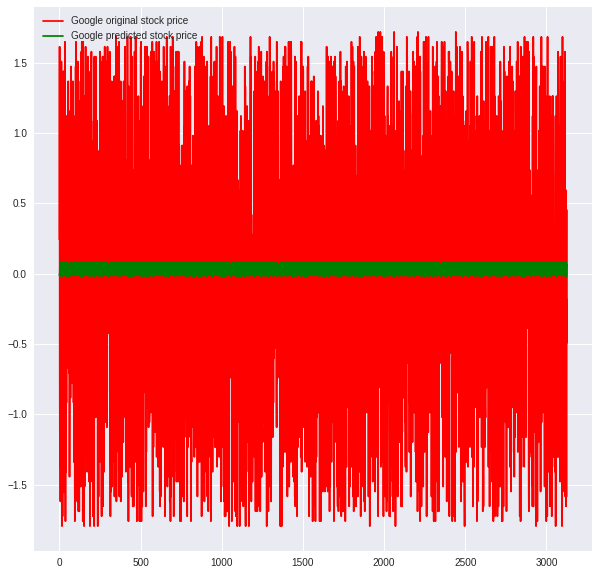

In [244]:
plt.figure(figsize = (10, 10))
plt.plot(y_train, label = 'Google original stock price', c = 'r')
plt.plot(y_pred, label = 'Google predicted stock price', c = 'g')
plt.legend()

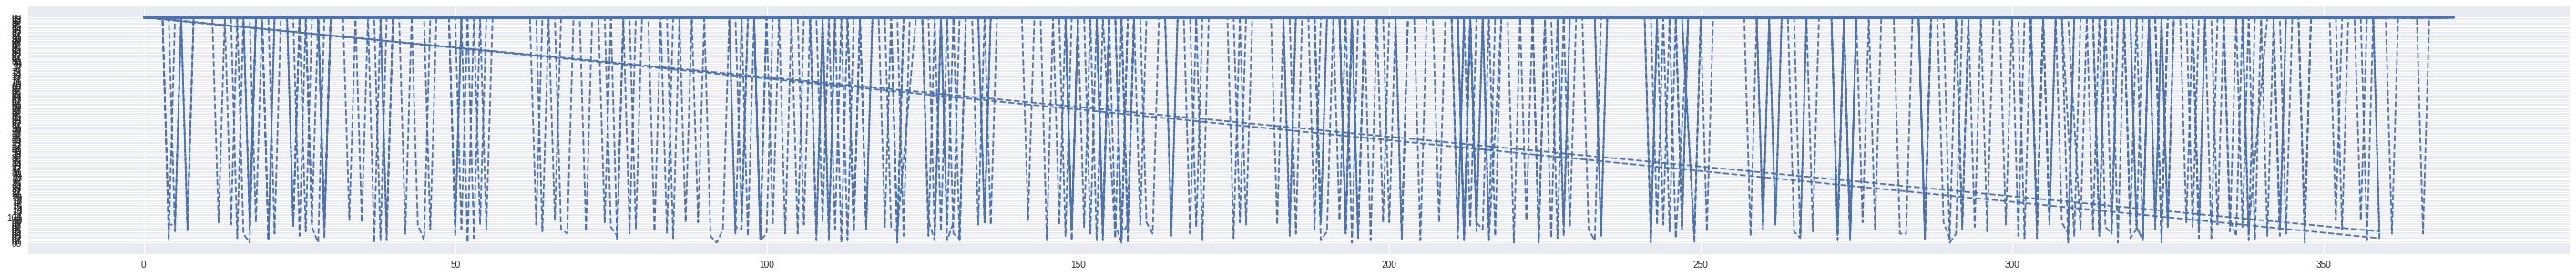

In [247]:
plt.figure(figsize = (50, 5))
plt.plot(df2.Number, linestyle = '--')